In [1]:
import os
import numpy as np
import pingouin as pg
import seaborn as sns

from wikisim import simtask

model_dir = '/Users/morton/Dropbox/work/bender/batch/models3'
fam_file = '/Users/morton/Dropbox/work/bender/mturk/mturk_fam.csv'

## Load Mturk familiarity ratings

In [2]:
fam = simtask.read_fam(fam_file)

In [3]:
grp = fam.groupby(['subcategory', 'subject'])
sub = grp[['condition', 'category']].first()
sub['fam'] = grp['response'].mean()

In [4]:
grp = sub.groupby(['category', 'subject'])
cat = grp[['condition']].first()
cat['fam'] = grp['fam'].mean()

## Compare familiarity between categories

In [5]:
cat.groupby('category')['fam'].agg(['mean', 'sem'])

,mean,sem
category,,
face,3.143137,0.080466
scene,2.844771,0.065123


In [6]:
pg.ttest(cat.loc['face', 'fam'], cat.loc['scene', 'fam'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,2.882282,100,two-sided,0.004833,"[0.09, 0.5]",0.570777,7.751,0.814482


## Compare familiarity between subcategories

In [7]:
sub.groupby(['subcategory'])['fam'].agg(['mean', 'sem'])

,mean,sem
subcategory,,
female,3.070588,0.088648
male,3.215686,0.076613
manmade,3.011765,0.073231
natural,2.677778,0.061504


In [8]:
pg.ttest(sub.loc['female', 'fam'] - sub.loc['male', 'fam'], 0)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.677029,50,two-sided,0.000577,"[-0.22, -0.07]",0.514887,46.419,0.950073


In [9]:
pg.ttest(sub.loc['manmade', 'fam'] - sub.loc['natural', 'fam'], 0)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,9.169139,50,two-sided,2.738394e-12,"[0.26, 0.41]",1.283936,3.167e+09,1.0


## Compare subcategory distributions

In [10]:
grp = fam.groupby('stim_id')
items = grp[['stim', 'category', 'subcategory']].first()
items['fam'] = grp['response'].mean()

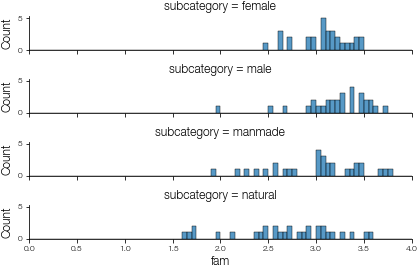

In [11]:
bins = np.arange(0, 4.01, .05)
g = sns.displot(
    data=items, x='fam', row='subcategory', aspect=6, height=1, bins=bins
)
g.set(xlim=(0, 4));

## Subsample to match familiarity

In [12]:
sample = simtask.match_fam_density(items, 'natural', 0)

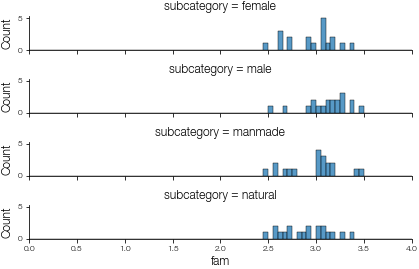

In [13]:
bins = np.arange(0, 4.01, .05)
g = sns.displot(
    data=sample, x='fam', row='subcategory', aspect=6, height=1, bins=bins
)
g.set(xlim=(0, 4));

## Test new statistics

In [14]:
sample.groupby('subcategory').agg(['mean', 'std', 'min', 'max', 'count'])

fam                                    
                 mean       std       min       max count
subcategory                                              
female       2.957688  0.253411  2.490196  3.372549    19
male         3.116615  0.236695  2.509804  3.450980    19
manmade      2.986584  0.276143  2.490196  3.470588    19
natural      2.898865  0.257425  2.490196  3.352941    19

In [15]:
sample_fam = fam.loc[fam['stim_id'].isin(sample.index)].copy()

In [16]:
grp = sample_fam.groupby(['subcategory', 'subject'])
sample_sub = grp[['condition', 'category']].first()
sample_sub['fam'] = grp['response'].mean()

In [17]:
grp = sample_sub.groupby(['category', 'subject'])
sample_cat = grp[['condition']].first()
sample_cat['fam'] = grp['fam'].mean()

## Compare familiarity between categories

In [18]:
sample_cat.groupby('category')['fam'].agg(['mean', 'sem'])

,mean,sem
category,,
face,3.037152,0.08637
scene,2.942724,0.07246


In [19]:
pg.ttest(sample_cat.loc['face', 'fam'], sample_cat.loc['scene', 'fam'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.837568,100,two-sided,0.404271,"[-0.13, 0.32]",0.165863,0.286,0.131789


In [20]:
sample.to_csv(os.path.join(model_dir, 'subsample.csv'))